# Load the dataset in pandas dataframe and perform basic data checks

For this project, we will use the Loan Prediction Problem Dataset from Kaggle. 
link: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset


In [1]:
import pandas as pd
import warnings

# Suppress FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

file_path = '../data/test_Y3wMUE5_7gLdaTN.csv'
data_df = pd.read_csv(file_path)

#  uncomment the following line to display the first 2 rows of the dataframe 
data_df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [2]:
#  uncomment the following line to display the last 2 rows of the dataframe
# data_df.tail(2)

In [3]:
# uncomment the following line to display the dataset dimensions
# data_df.shape

In [4]:
# Uncomment the following line to display detailed column informations
# data_df.info()


In [5]:
# Uncomment the following line to check for missing values
# data_df.isnull().sum().to_frame()


In [6]:
# Uncomment the following line to check for duplicate rows
# data_df.duplicated().sum()

In [7]:
# uncomment the following line to display statistical summary of the dataframe
# data_df.describe()

In [8]:
# Uncomment the following line to display the value counts of the Gender column
# data_df["Gender"].value_counts().to_frame()


In [9]:
# Uncomment the following line to display the number of unique values in each column
# data_df.nunique().to_frame()

In [10]:
# Uncomment the following line to display the data types of the columns
# data_df.dtypes.to_frame()

In [11]:
# Quick correlation matrix

# select only the numerical columns
numerical_df = data_df.select_dtypes(include=['number'])

# calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# uncomment the following line to display the correlation matrix
# correlation_matrix


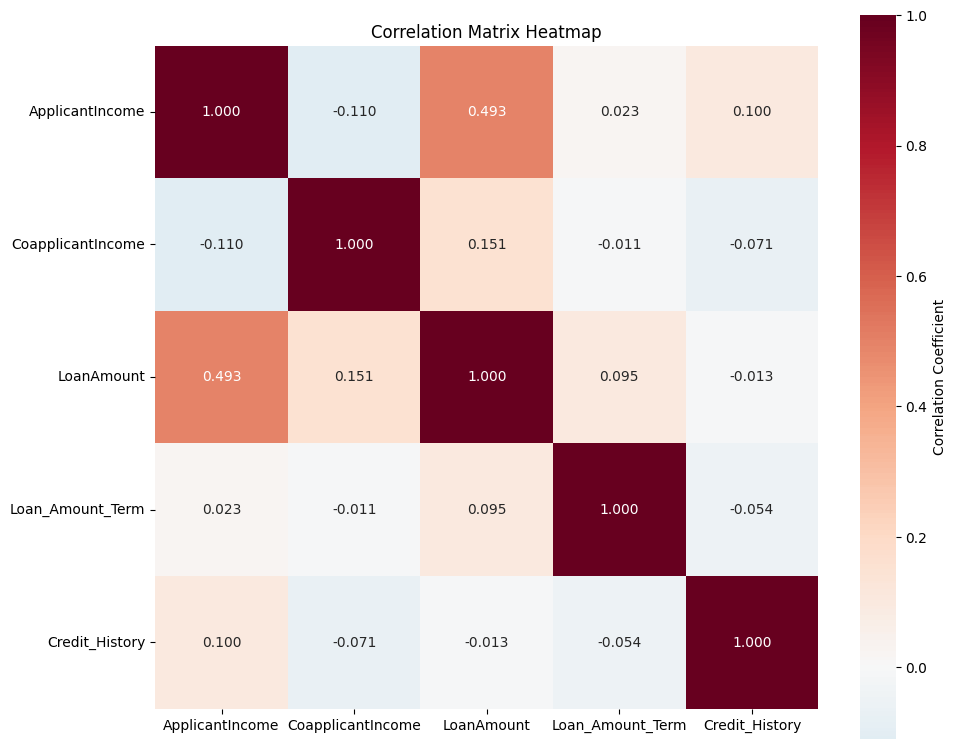

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0, 
            square=True, 
            fmt='.3f',
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()

# Handling Missing Values

We'll analyze missing value patterns and apply suitable imputation strategies based on data types and context.


In [13]:
# Comprehensive missing value analysis
missing_values = data_df.isnull().sum()
total_rows = len(data_df)

# Create a detailed missing value report
missing_report = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': round((missing_values / total_rows) * 100, 2),
    'Data_Type': data_df.dtypes
})

# Filter only columns with missing values
missing_report = missing_report[missing_report['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print(f"Dataset shape: {data_df.shape}")
print(f"Total rows: {total_rows}")
print(f"Columns with missing values: {len(missing_report)}")
print("\n" + "="*50)
print("MISSING VALUE ANALYSIS")
print("="*50)

missing_report

Dataset shape: (367, 12)
Total rows: 367
Columns with missing values: 6

MISSING VALUE ANALYSIS


,Missing_Count,Missing_Percentage,Data_Type
Credit_History,29,7.90,float64
Self_Employed,23,6.27,object
Gender,11,3.00,object
Dependents,10,2.72,object
Loan_Amount_Term,6,1.63,float64
LoanAmount,5,1.36,float64


In [14]:
# Analyze missingness patterns and validate imputation strategy
print("MISSINGNESS PATTERN ANALYSIS")
print("="*50)

# Check if any column has >40% missing values (would consider dropping)
# This is a business decision and can be adjusted based on the business context and the importance of the column
# For this project, we'll use 40% as the threshold

high_missing_threshold = 5
high_missing_cols = missing_report[missing_report['Missing_Percentage'] > high_missing_threshold].copy(deep=True)

if len(high_missing_cols) > 0:
    print(f"Columns with >{high_missing_threshold}% missing values:")
    for col in high_missing_cols.index:
        print(f"   - {col}: {high_missing_cols.loc[col, 'Missing_Percentage']:.1f}%")
    print("   → Consider dropping these columns unless critical for analysis")
else:
    print(f"No columns have >{high_missing_threshold}% missing values")

print("\nMissing Value Summary:")
print(f"   • Highest missing percentage: {missing_report['Missing_Percentage'].max():.1f}% ({missing_report.index[0]})")
print(f"   • Most missing values: {missing_report['Missing_Count'].max()} ({missing_report.index[0]})")


MISSINGNESS PATTERN ANALYSIS
Columns with >5% missing values:
   - Credit_History: 7.9%
   - Self_Employed: 6.3%
   → Consider dropping these columns unless critical for analysis

Missing Value Summary:
   • Highest missing percentage: 7.9% (Credit_History)
   • Most missing values: 29 (Credit_History)


In [15]:
# copy the original dataframe to preserve the raw version
clean_data_df = data_df.copy(deep=True)

# Separate the data into categorical and numerical columns
categorical_columns = clean_data_df.select_dtypes(include=['object', 'category']).columns
numerical_columns = clean_data_df.select_dtypes(include=['number']).columns

# Print the number of categorical and numerical columns
print(f"Number of categorical columns: {len(categorical_columns)} \n {list(categorical_columns)}")
print(f"Number of numerical columns: {len(numerical_columns)} \n {list(numerical_columns)}")


Number of categorical columns: 7 
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
Number of numerical columns: 5 
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [16]:
# Impute the categorical columns with the mode or 'Unknown'
# There could be many methods to impute the categorical columns (mainly driven by the business context)
# For this project, we'll use the mode or 'Unknown'

missing_report["Imputed_Value"] = None

for col in categorical_columns:
    if clean_data_df[col].isnull().sum() > 0:
        mode_value = clean_data_df[col].mode()[0] if len(clean_data_df[col].mode()) > 0 else 'Unknown'
        missing_report.loc[col, "Imputed_Value"] = mode_value
        clean_data_df[col] = clean_data_df[col].fillna(mode_value)
    else:
        print(f"No missing values in {col}")

# Print the number of missing values in each column
clean_data_df.isnull().sum().to_frame()

No missing values in Loan_ID
No missing values in Married
No missing values in Education
No missing values in Property_Area


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [17]:
# Impute the numerical columns with the mean
# There could be many methods to impute the numerical columns (mainly driven by the business context)
# For this project, we'll use the mean

for col in numerical_columns:
    if clean_data_df[col].isnull().sum() > 0:
        mean_value = clean_data_df[col].mean()
        missing_report.loc[col, "Imputed_Value"] = mean_value
        clean_data_df[col] = clean_data_df[col].fillna(mean_value)
    else:
        print(f"No missing values in {col}")

# Print the number of missing values in each column
clean_data_df.isnull().sum().to_frame()

No missing values in ApplicantIncome
No missing values in CoapplicantIncome


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [18]:
# Final validation of data cleaning
print("DATA CLEANING VALIDATION")
print("="*50)

# Check if all missing values are handled
remaining_missing = clean_data_df.isnull().sum().sum()
print(f"✅ Total missing values after cleaning: {remaining_missing}")

# Compare before and after
print("\nBEFORE vs AFTER CLEANING:")
print(f"   • Original missing values: {data_df.isnull().sum().sum()}")
print(f"   • After cleaning: {remaining_missing}")
print(f"   • Missing values eliminated: {data_df.isnull().sum().sum() - remaining_missing}")

# Validate imputation results
print("\nIMPUTATION SUMMARY:")
display(missing_report)

DATA CLEANING VALIDATION
✅ Total missing values after cleaning: 0

BEFORE vs AFTER CLEANING:
   • Original missing values: 84
   • After cleaning: 0
   • Missing values eliminated: 84

IMPUTATION SUMMARY:


,Missing_Count,Missing_Percentage,Data_Type,Imputed_Value
Credit_History,29,7.90,float64,0.825444
Self_Employed,23,6.27,object,No
Gender,11,3.00,object,Male
Dependents,10,2.72,object,0
Loan_Amount_Term,6,1.63,float64,342.537396
LoanAmount,5,1.36,float64,136.132597


# Normalize Categorical Data

**Goal**: Convert non-numeric categorical values into consistent, model-friendly formats.

**Steps to implement**:
1. **Check for inconsistencies**: Identify variations in spelling, casing, and formatting
2. **Standardize values**: Clean and normalize categorical values


In [23]:
# Step 1: Analyze current categorical data for inconsistencies
print("CATEGORICAL DATA ANALYSIS")
print("="*50)

# Define a threshold for high cardinality
# This is a business decision and can be adjusted based on the business context 
# For this project, we'll use 10 as the threshold
cardinality_threshold = 10

# Create a copy to track changes
normalized_data_df = clean_data_df.copy(deep=True)

# Analyze each categorical column
categorical_analysis = {}

for col in categorical_columns:
    # Standardize text
    normalized_data_df[col] = normalized_data_df[col].astype(str).str.lower().str.strip()

    unique_values = normalized_data_df[col].unique()
    value_counts = normalized_data_df[col].value_counts()
    
    categorical_analysis[col] = {
        'unique_count': len(unique_values),
        'unique_values': unique_values,
        'value_counts': value_counts,
        'cardinality': 'high' if len(unique_values) > cardinality_threshold else 'low'
    }
    
pd.DataFrame(categorical_analysis).T

CATEGORICAL DATA ANALYSIS


,unique_count,unique_values,value_counts,cardinality
Loan_ID,367,"[lp001015, lp001022, lp001031, lp001035, lp001...",Loan_ID lp001015 1 lp002389 1 lp002383 ...,high
Gender,2,"[male, female]",Gender male 297 female 70 Name: count...,low
Married,2,"[yes, no]","Married yes 233 no 134 Name: count, dty...",low
Dependents,4,"[0, 1, 2, 3+]",Dependents 0 210 2 59 1 58 3+ ...,low
Education,2,"[graduate, not graduate]",Education graduate 283 not graduate ...,low
Self_Employed,2,"[no, yes]",Self_Employed no 330 yes 37 Name: coun...,low
Property_Area,3,"[urban, semiurban, rural]",Property_Area urban 140 semiurban 11...,low


In [20]:
# Step 2: Standardize categorical values
print("\nSTANDARDIZING CATEGORICAL VALUES")
print("="*50)

# the following mappings are based on the business context and can be adjusted based on the business context
# for this project, we'll use the following mappings

gender_mapping = {
    'm': 'male',
    'f': 'female',
    'male': 'male',
    'female': 'female'
}

binary_mappings = {
    'yes': True,
    'no': False,
    'y': True,
    'n': False,
    'true': True,
    'false': False
}

# Identify columns with binary patterns and apply mapping
for col in categorical_columns:
    unique_vals = normalized_data_df[col].dropna().unique()
    if set(unique_vals).issubset(set(binary_mappings.keys())):
        normalized_data_df[col] = normalized_data_df[col].map(binary_mappings)


normalized_data_df[categorical_columns].head()



STANDARDIZING CATEGORICAL VALUES


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,lp001015,male,True,0,graduate,False,urban
1,lp001022,male,True,1,graduate,False,urban
2,lp001031,male,True,2,graduate,False,urban
3,lp001035,male,True,2,graduate,False,urban
4,lp001051,male,False,0,not graduate,False,urban


# Outlier Detection

We'll identify numerical outliers using the IQR method and visualize their distribution.


In [21]:
import pandas as pd

# Select only numeric columns
numeric_cols = normalized_data_df.select_dtypes(include='number').columns

# Store outlier info
outlier_summary = {}

# Loop through numeric columns to detect outliers
for col in numeric_cols:
    Q1 = normalized_data_df[col].quantile(0.25)
    Q3 = normalized_data_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = normalized_data_df[(normalized_data_df[col] < lower_bound) | (normalized_data_df[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    # Store result
    outlier_summary[col] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_count': outlier_count,
        'outlier_percentage': round((outlier_count / normalized_data_df.shape[0]) * 100, 2)
    }

# Convert summary to DataFrame for easy viewing
outlier_df = pd.DataFrame(outlier_summary).T.sort_values(by='outlier_count', ascending=False)


# Display outlier summary
outlier_df

,lower_bound,upper_bound,outlier_count,outlier_percentage
Credit_History,1.00,1.00,88.0,23.98
Loan_Amount_Term,360.00,360.00,56.0,15.26
ApplicantIncome,-430.00,8354.00,32.0,8.72
LoanAmount,16.25,242.25,18.0,4.90
CoapplicantIncome,-3645.75,6076.25,8.0,2.18


OUTLIER VISUALIZATION


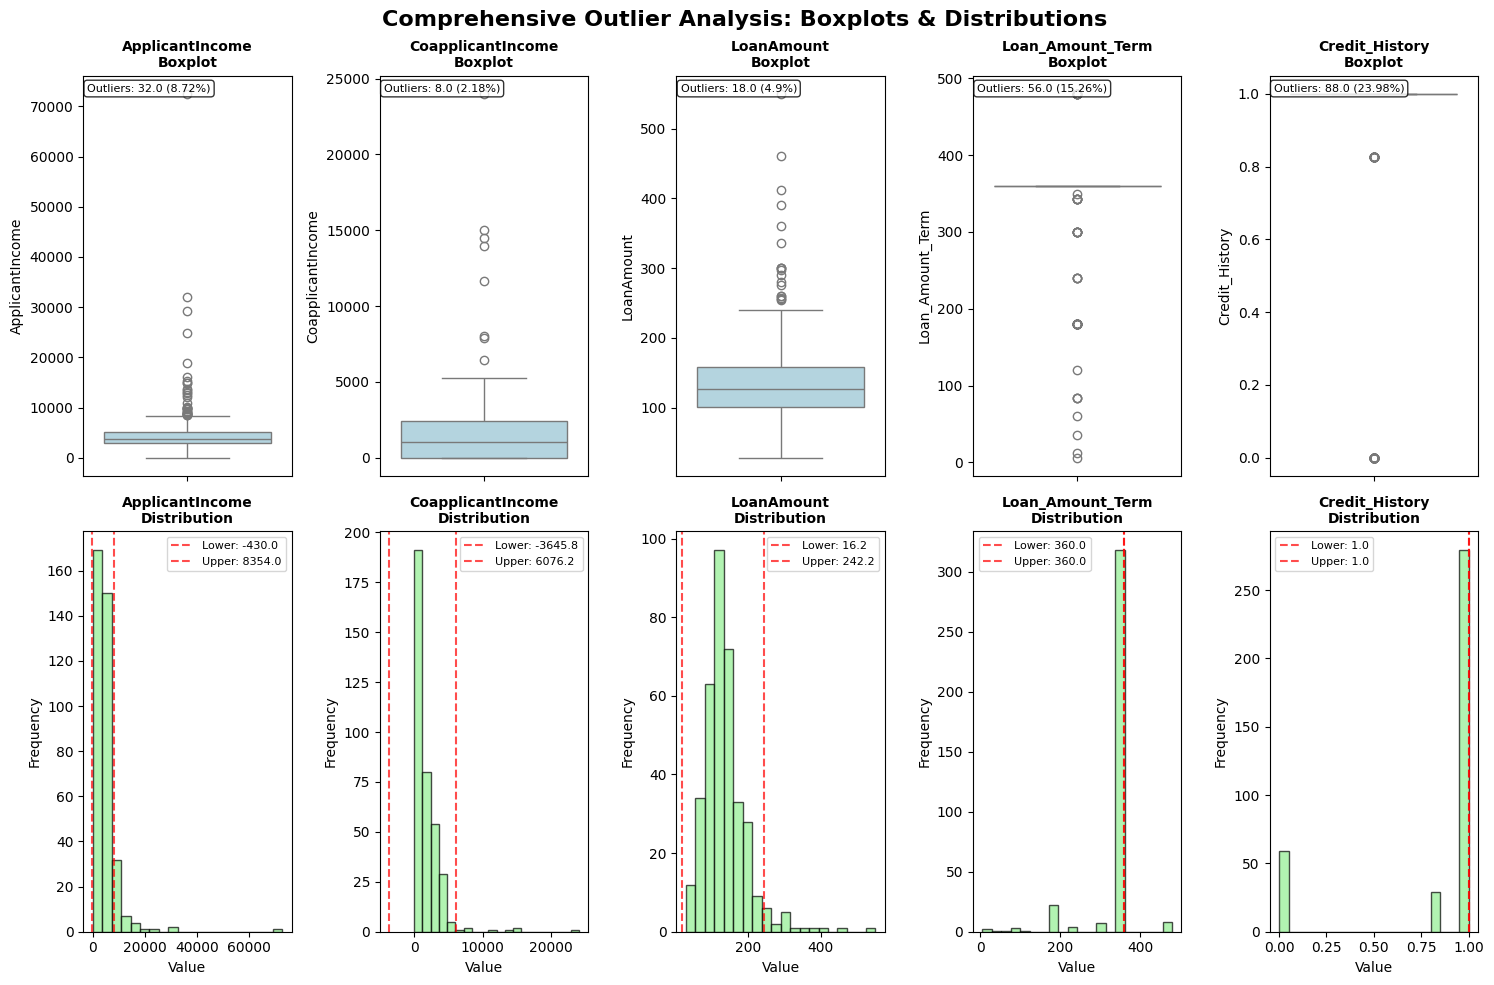

In [22]:
# Enhanced outlier visualization
print("OUTLIER VISUALIZATION")
print("="*50)

# Get all numeric columns for comprehensive analysis
numeric_cols_list = list(numeric_cols)

# Create enhanced plots
fig, axes = plt.subplots(2, len(numeric_cols_list), figsize=(15, 10))
if len(numeric_cols_list) == 1:
    axes = axes.reshape(2, 1)

for i, col in enumerate(numeric_cols_list):
    # Boxplot (top row)
    sns.boxplot(y=normalized_data_df[col], ax=axes[0, i], color='lightblue')
    axes[0, i].set_title(f'{col}\nBoxplot', fontsize=10, fontweight='bold')
    
    # Add outlier statistics to the plot
    outlier_count = outlier_df.loc[col, 'outlier_count']
    outlier_pct = outlier_df.loc[col, 'outlier_percentage']
    axes[0, i].text(0.02, 0.98, f'Outliers: {outlier_count} ({outlier_pct}%)', 
                    transform=axes[0, i].transAxes, fontsize=8, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Histogram with outlier highlighting (bottom row)
    axes[1, i].hist(normalized_data_df[col], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    
    # Highlight outlier regions
    lower_bound = outlier_df.loc[col, 'lower_bound']
    upper_bound = outlier_df.loc[col, 'upper_bound']
    
    # Add vertical lines for outlier boundaries
    axes[1, i].axvline(lower_bound, color='red', linestyle='--', alpha=0.7, label=f'Lower: {lower_bound:.1f}')
    axes[1, i].axvline(upper_bound, color='red', linestyle='--', alpha=0.7, label=f'Upper: {upper_bound:.1f}')
    
    axes[1, i].set_title(f'{col}\nDistribution', fontsize=10, fontweight='bold')
    axes[1, i].set_xlabel('Value')
    axes[1, i].set_ylabel('Frequency')
    axes[1, i].legend(fontsize=8)

plt.suptitle("Comprehensive Outlier Analysis: Boxplots & Distributions", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
